In [4]:
import obspy
from obspy import UTCDateTime
from obspy.core import Stream, Trace
import numpy as np
from obspy.signal.trigger import classic_sta_lta, plot_trigger
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.sans-serif']= 'Times New Roman'
%matplotlib ipympl

def mkStream(data, starttime, fs=100):
    """
    将数据转换为obspy的Stream对象
    """

    st = Stream()
    if data.ndim == 1:
        tr = Trace(data, header={
            'network': 'XX',
            'station': 'XX',
            'location': '',
            'channel': 'HHZ',
            'npts': data.shape[0],
            'sampling_rate': fs,
            'mseed': {'dataquality': 'D'},
            'starttime': UTCDateTime(starttime)
        })
    elif data.ndim == 2:
        for i in range(data.shape[0]):
            tr = Trace(data[i], header={
                'network': 'XX',
                'station': 'XX{}'.format(i),
                'location': '',
                'channel': 'HHZ',
                'npts': data.shape[1],
                'sampling_rate': fs,
                'mseed': {'dataquality': 'D'},
                'starttime': UTCDateTime(starttime)
            })

    st.append(tr)

    return st

def plotTrigger(st):
    """
    绘制触发图
    """

    tr = tr
    df = tr.stats.sampling_rate
    cft = classic_sta_lta(tr.data, int(0.2 * df), int(5 * df))
    plot_trigger(tr, cft, 3.0, 4.0)


def showRawData(ax, d, title, scale=50):
    # 设置色彩映射的中心为数据的中位数
    midpoint = np.median(d)
    extreme = max(abs(d.min()), abs(d.max()))
    vmin, vmax = -extreme/scale, extreme/scale

    ax.imshow(d, aspect='auto', 
            cmap='rainbow', vmin=vmin, vmax=vmax, 
            interpolation='bilinear',
            extent=[0, d.shape[1], 60, 0])
    ax.set_xlabel('Channel')
    ax.set_ylabel('Time (s)')
    ax.set_title(title)


def showSpectrogram(ax1, ax2, t, data, frequencies, times, Sxx, i, vmin, vmax):
    # with plt.style.context('ggplot'):
        # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
    ax1.plot(t, data)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax1.set_title(f'{i*2:.1f} (m)')
    ax1.set_ylabel('Amplitude')

    ax2.imshow(Sxx, cmap='jet', aspect='auto',
                extent=[times[0], times[-1], frequencies[0], frequencies[-1]], 
                origin='lower',interpolation='bilinear',
                vmin=vmin, vmax=vmax)
    ax2.grid(False)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    ax1.xaxis.label.set_visible(False)

    for label in ax1.get_yticklabels():
        label.set_fontsize(8)
    for label in ax2.get_yticklabels():
        label.set_fontsize(8)


In [1]:
import sys
sys.path.insert(0, '../')
import random
from dasQt import das
import numpy as np
import pathlib
from datetime import datetime, timedelta



das1 = das.DAS()

das1.scale = 100
# path_dir = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
# files = list(path_dir.glob('*.dat'))
path_dir = pathlib.Path('/Volumes/CSIM_LAB/DATA/nanhu-2024-02-01')
files = list(path_dir.glob('*.h5'))

files = sorted(files)[50:]
starttime = files[0].stem

In [ ]:
# _2024-02-01_08-50-58_UTC.h5
# _2024-02-01_08-52-58_UTC.h5
# _2024-02-01_08-53-58_UTC.h5
# _2024-02-01_09-11-58_UTC.h5
# _2024-02-01_09-19-58_UTC.h5






In [9]:
dt_format = "%Y-%m-%d_%H-%M-%S"
start_time = datetime.strptime(starttime[1:20], dt_format)
# dt_format = "%Y-%m-%d-%H-%M-%S"
# start_time = datetime.strptime(starttime[:19], dt_format)

# 9:19 9:27 9:32 9:36 9:47
# 7:59 8:00 8:01 8:02 8:04
# 8:38 9:03 9:04 9:12 9:13
# 10:01
# 10:09 10:14
end_time = datetime(2024, 2, 1, 9, 36, 58)
# end_time = datetime(2024, 2, 1, 9, 36, 44)
end_time_beijing = end_time + timedelta(hours=8)
print(end_time_beijing.strftime(dt_format))
# 计算时间差
time_difference = end_time - start_time
index = int(time_difference.total_seconds() / 60)

# file = random.choice(files)
file = files[index]
# name = file.stem
name = end_time_beijing.strftime(dt_format)
das1.readData(file)
das1.cutData(60, 330)

d = das1.data
dt = das1.dt

2024-03-14 15:47:24,001 INFO	das: 153	
_2024-02-01_09-36-58_UTC.h5 read done!
2024-03-14 15:47:24,003 INFO	das: 153	Cut Data Done!


2024-02-01_17-36-58


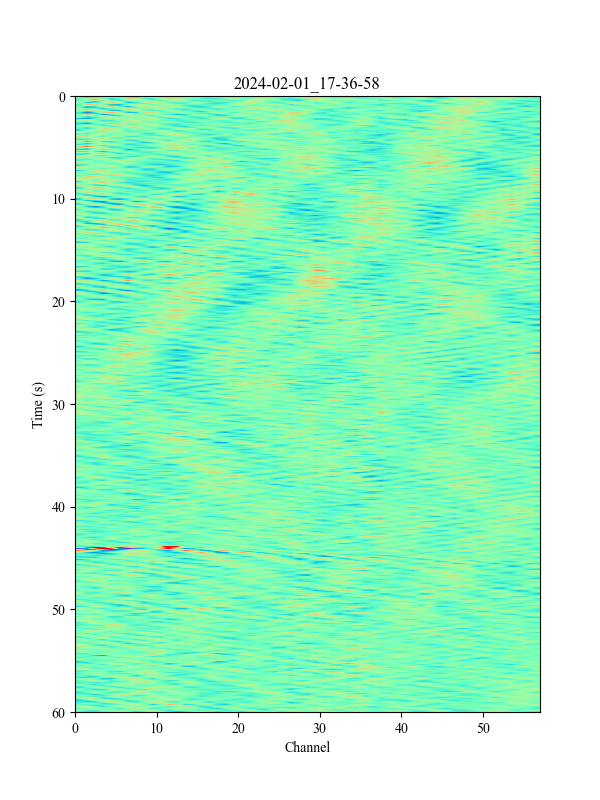

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
showRawData(ax, d, title=name, scale=50)
# plt.savefig('raw_data.png', dpi=1000)

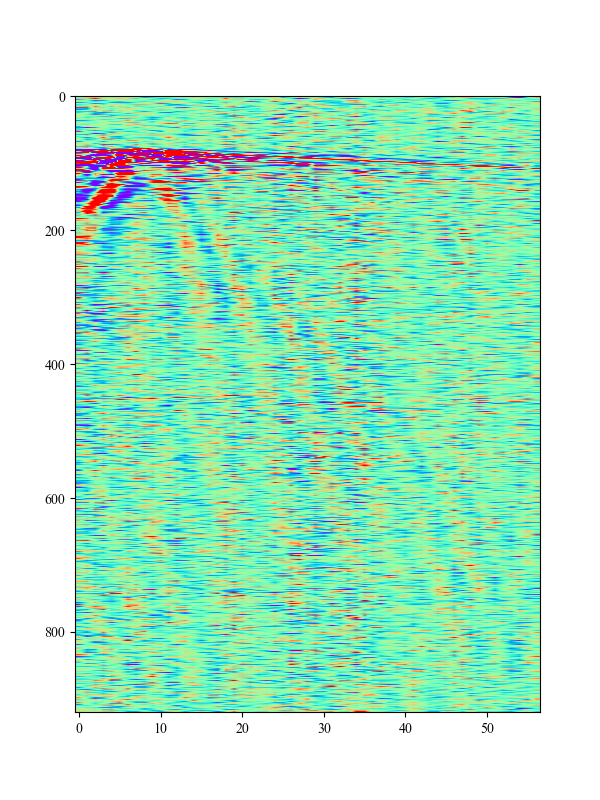

In [13]:
a = d[int(43.7*400):int(46.0*400), :]

# b = a / np.max(a, axis=1)

# for i in range(a.shape[1]):
#     a[:, i] = a[:, i] / np.max(a[:, i])

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(a, aspect='auto', cmap='rainbow', interpolation='bilinear',
             vmin=-300, vmax=300)
plt.show()

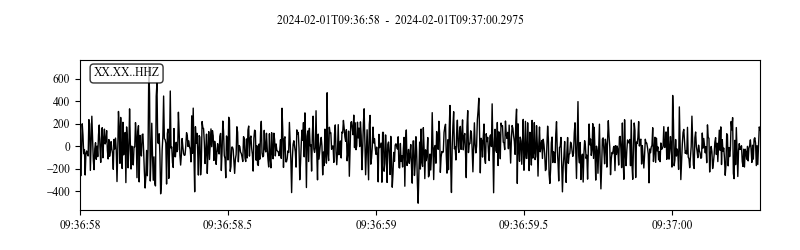

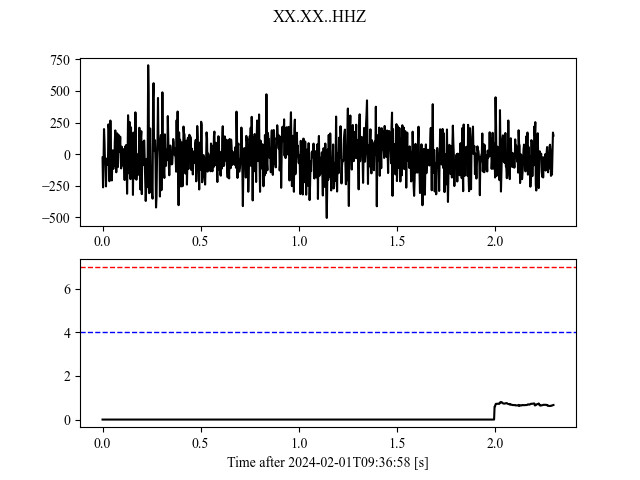

In [14]:
st = mkStream(d[:, 30], starttime=end_time, fs=1/dt)
st[0].plot()
tr = st[0]
df = tr.stats.sampling_rate
cft = classic_sta_lta(tr.data, int(0.2 * df), int(2 * df))
plot_trigger(tr, cft, 7.0, 4.0)

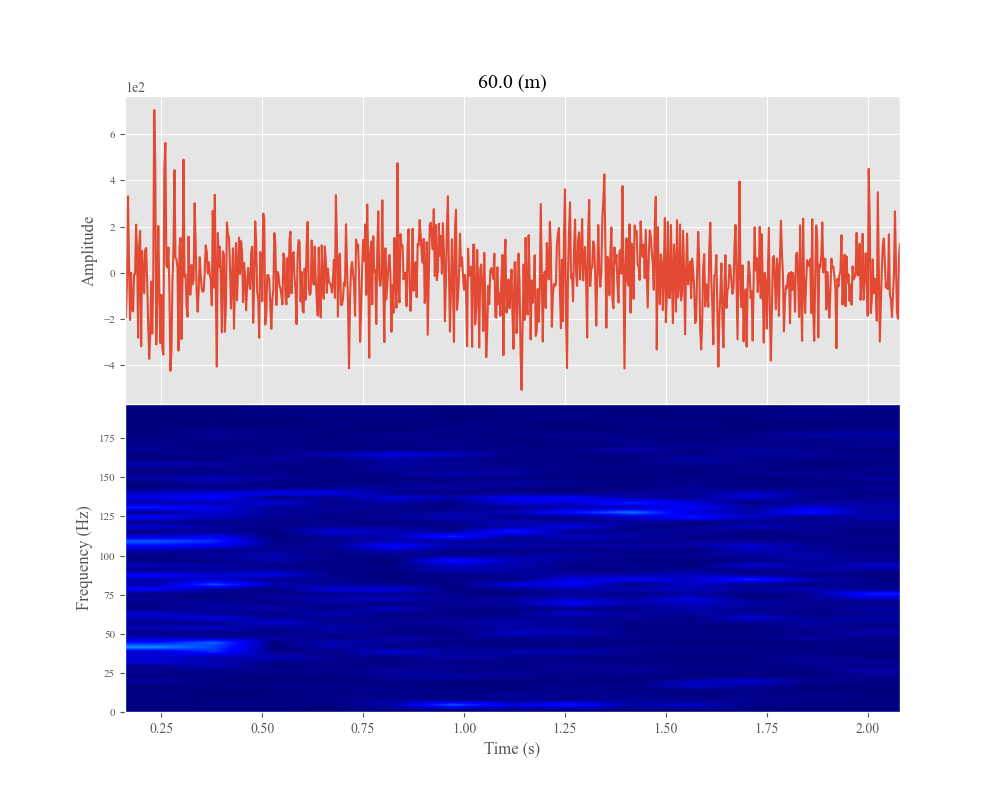

In [15]:
from scipy import signal

Fmax = 200


dt = tr.stats.delta
nt = tr.stats.npts
start = 0
end = 60
data = tr.data[int(nt//60 * start):int(nt//60 * end)]
nt = data.shape[0]
t = np.arange(0, nt*dt, dt)


i = 1
frequencies, times, Sxx = signal.spectrogram(data, fs=1/dt, 
                                            nperseg=128*i,      # length of each segment
                                            noverlap=64*i,      # overlap between segments
                                            nfft=128*i)

index = np.abs(frequencies - Fmax).argmin()
Sxx = Sxx[:index, :]
frequencies = frequencies[:index]


with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    showSpectrogram(ax1, ax2, t, data, 
                    frequencies, times, Sxx, 
                    30, 0, 5e3)


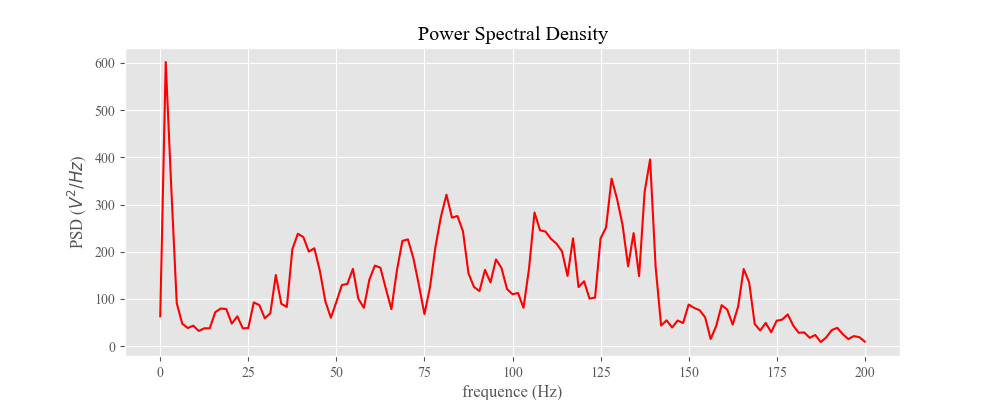

In [16]:
PSD = signal.welch(tr.data, fs=tr.stats.sampling_rate)

with plt.style.context('ggplot'):
    fig, ax3 = plt.subplots(1, 1, figsize=(10, 4))
    ax3.plot(PSD[0], PSD[1], 'r', label='PSD')
    ax3.set_xlabel('frequence (Hz)')
    ax3.set_ylabel('PSD ($V^2/Hz$)')
    ax3.set_title('Power Spectral Density')

In [ ]:

cmin = 10
cmax = 500
dc = 10
fmin = 1
fmax = 40

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
das1.imshowDispersion1(ax, cmin, cmax, dc, fmin, fmax)

In [ ]:
from scipy import signal
import obspy
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np
import pathlib


Fmax = 250
# trace = 250
# dt = das1.dt
# t, data, xf, yf = das1.signalTrace(trace)


# path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/nanhu-2024-02-01-mseed-all')
path_dir_new1 = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/new_2024-02-01-all')
for file in sorted(path_dir_new1.glob('*.mseed')):
    file = path_dir_new1 / '070.mseed'
    d = obspy.read(file)
    tr = d[0]
    df = tr.stats.sampling_rate
    dt = 1/df

    data = tr.data[int(2000//dt):]
    t = np.arange(0, len(data)/df, 1/df)
    
    tr.data = data
    
    
    break



In [ ]:
tr.plot()

In [ ]:
plotTrigger(d)

In [3]:
class Car:
    total_cars = 0  # 类变量

    def __init__(self, make):
        self.make = make  # 实例变量
        Car.total_cars += 1

    def display_make(self):  # 实例方法
        print(f'This car is a {self.make}.')

    @classmethod
    def display_total_cars(cls):  # 类方法
        print(f'Total cars: {cls.total_cars}')

    @staticmethod
    def is_motor_vehicle():  # 静态方法
        return True

# 创建实例
car1 = Car("Toyota")
car2 = Car("Honda")

# 调用实例方法
car1.display_make()

# 调用类方法
Car.display_total_cars()

# 调用静态方法
print(Car.is_motor_vehicle())

car2.is_motor_vehicle()

This car is a Toyota.
Total cars: 2
True


True